In [10]:
%matplotlib inline
import numpy as np
from proj1_helpers import *
from implementations import *
from helpers import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:


y, features, ids = load_csv_data('train.csv')
yTest , featuresTest, idsTest = load_csv_data('test.csv')
#inv = features[:,2]
#inv[inv == -999] = np.nan

#print(np.count_nonzero(np.isnan(inv)))
features, featuresTest = cleanDataSet(features, featuresTest)



In [3]:
def add_features(dataset):
    tau = [13, 14, 15]
    lep = [16, 17, 18]
    jet_lea = [23, 24, 25]
    jet_sub = [26, 27, 28]
    
    features_to_add =[]
    features_to_add.append(compute_invariant_mass(dataset, tau, jet_lea))
    features_to_add.append(compute_invariant_mass(dataset, tau, jet_sub))
    features_to_add.append(compute_invariant_mass(dataset, lep, jet_lea))
    features_to_add.append(compute_invariant_mass(dataset, lep, jet_sub))
    
    features_to_add.append(compute_transverse_mass(dataset, tau, jet_lea))
    features_to_add.append(compute_transverse_mass(dataset, tau, jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, tau, lep))
    features_to_add.append(compute_transverse_mass(dataset, lep, jet_lea))
    features_to_add.append(compute_transverse_mass(dataset, lep, jet_sub))
    features_to_add.append(compute_transverse_mass(dataset, jet_sub, jet_lea))
    features_to_add = np.array(features_to_add)
    return features_to_add.transpose()
    

In [13]:
test_add_features = normalize(add_features(featuresTest))
train_add_features = normalize(add_features(features))

In [14]:
features = np.delete(features, [14, 15 , 17, 18, 20, 21, 24, 25, 27, 28], 1)
featuresTest = np.delete(featuresTest, [14, 15 , 17, 18, 20, 21, 24, 25, 27, 28], 1)
features = np.concatenate((features,train_add_features), 1)
featuresTest = np.concatenate((featuresTest, test_add_features), 1)

In [15]:
features = normalize(features)
featuresTest = normalize(featuresTest)

In [16]:

#comb = combinations(features)
#comb2 = combinations(featuresTest)
print('combinations done')

features = normalize(build_poly(features, 1, 9))
#featuresTest = build_poly(featuresTest, 1 ,6)
print("poly done")

#features = np.concatenate((features,comb),1)
#featuresTest = np.concatenate((featuresTest,comb2),1)

combinations done
poly done


0.8025360000000001 1e-14
0.789813366399 1e-07


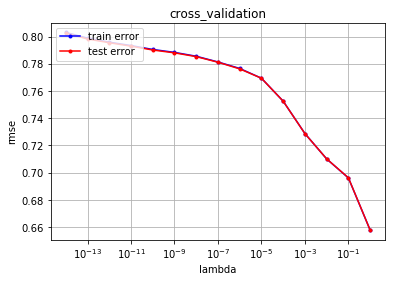

In [17]:
cross_validation_demo(y, features, np.logspace(-14,0,15),6)

In [11]:
lambda_ = 10**-6#0.1638
w, loss = ridge_regression(y, features, lambda_)

In [12]:
yPred = predict_labels(w,featuresTest)

In [13]:
create_csv_submission(idsTest,yPred,'prediction.csv')